In [76]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
digits = load_digits()

In [77]:
x = digits['data']
x = x/16
x.shape

(1797, 64)

In [78]:
y = digits['target']

In [79]:
def Prob(x,mu,k):
    p = 1
    for i in range(0,x.shape[0]):
        p *= k*(mu[i] ** x[i])*(1- mu[i])**(1-x[i])
    return p

In [80]:
labelMap = {}
def E(p,pi,k):
    gamma = np.zeros((x.shape[0],pi.shape[0]))
    for i in range(0,x.shape[0]):
        for j in range(0,pi.shape[0]):
            gamma[i][j] = pi[j] * Prob(x[i], p[j],k)
        gamma[i] /= np.sum(gamma[i])
        labelMap[y[i]] = np.argmax(gamma[i])

    return gamma

In [81]:
def M(gamma):
    pi = np.sum(gamma,axis=0)/x.shape[0]

    p = x.T @ gamma
    p = p.T

    n = p.T / (pi*x.shape[0])
    p = n.T
    
    return p, pi

In [82]:
p = np.random.rand(10,784)
pi = np.random.rand(10)
factor = 1/np.sum(pi)
pi = pi * factor
np.sum(pi)
p.shape

(10, 784)

In [84]:
for i in range(0,100):
    gamma = E(p,pi,1)
    p, pi  = M(gamma)

In [85]:
pi

array([0.04496376, 0.13389924, 0.11490832, 0.09460915, 0.01508242,
       0.07062592, 0.08226707, 0.09845207, 0.24578819, 0.09940385])

In [86]:
p

array([[0.00000000e+00, 2.46941807e-10, 1.91081880e-03, 1.08460520e-01,
        6.78907389e-01, 8.18292688e-01, 2.92681326e-01, 1.83082267e-02,
        1.90757328e-12, 3.35165646e-03, 1.30337892e-01, 5.66097749e-01,
        8.56402709e-01, 8.09622398e-01, 3.51647737e-01, 1.93367462e-02,
        9.97166607e-13, 1.09114201e-01, 5.85265033e-01, 7.87386545e-01,
        7.63594250e-01, 8.40827138e-01, 2.58698064e-01, 7.34455960e-03,
        4.59041336e-08, 2.40641306e-01, 7.79218178e-01, 7.44782452e-01,
        8.36465695e-01, 8.59480630e-01, 1.56602246e-01, 7.75586372e-06,
        0.00000000e+00, 1.09471377e-01, 4.04680397e-01, 4.21223960e-01,
        7.17025395e-01, 7.92972972e-01, 1.01367023e-01, 0.00000000e+00,
        3.35507903e-09, 2.92080274e-02, 7.95282769e-02, 1.84025010e-01,
        7.23333205e-01, 7.50551681e-01, 6.31751986e-02, 1.55638062e-13,
        2.99472964e-14, 1.85667915e-03, 8.57328839e-03, 1.60075603e-01,
        7.83491852e-01, 7.23683197e-01, 1.01527449e-01, 4.179353

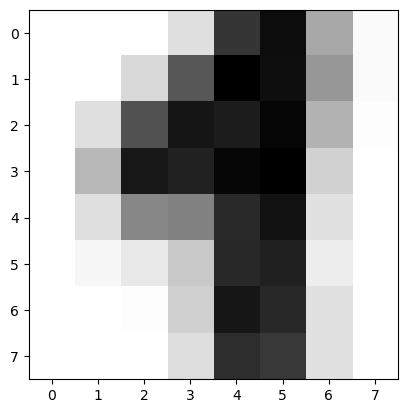

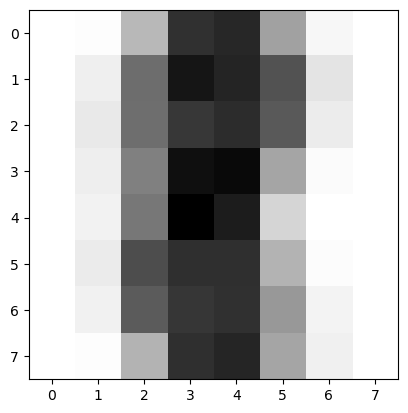

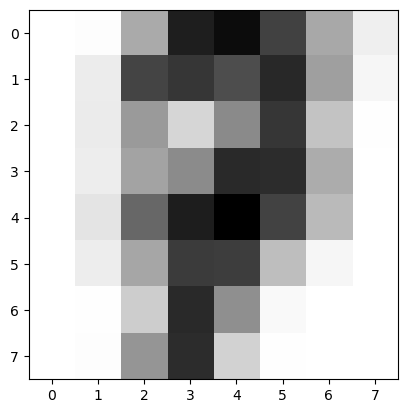

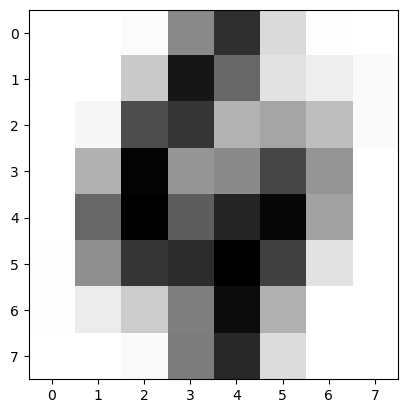

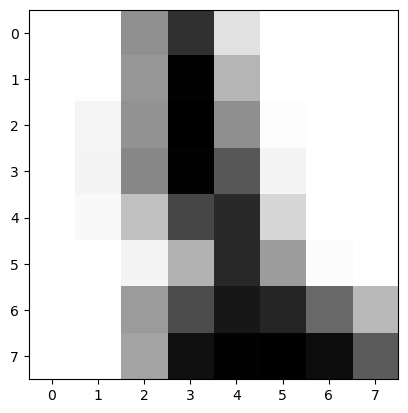

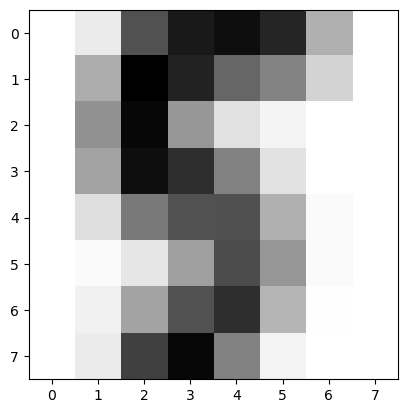

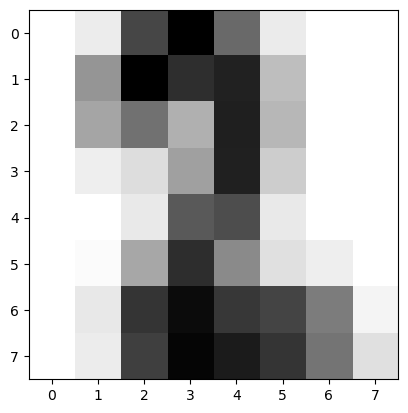

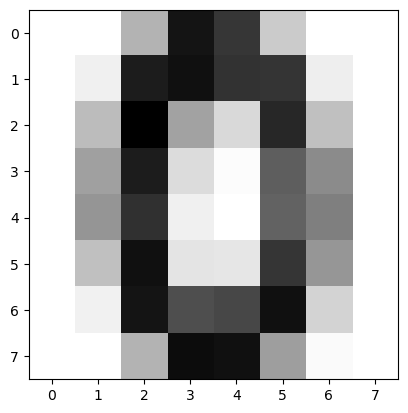

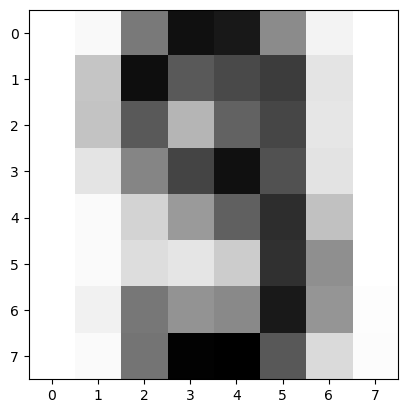

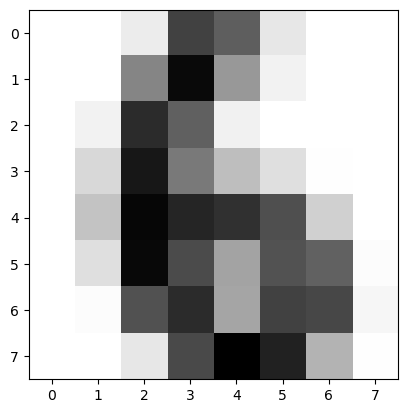

In [87]:
for mean in p:
    plt.imshow(mean.reshape(8,8), cmap = plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [88]:
label_est = np.zeros(x.shape[0])
for sample in range(x.shape[0]):
    prob = 0
    for cluster in range(pi.shape[0]):
        p1 = pi[cluster] * Prob(x[sample],p[cluster],1)
        if(p1 > prob):
            prob = p1
            label_est[sample] = cluster

In [89]:
label_est

array([7., 1., 1., ..., 1., 8., 8.])

In [90]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [91]:
def Accuracy(estLabel,actualLabel):
    sum = 0
    for i in range(actualLabel.shape[0]):
        if estLabel[i] == labelMap[actualLabel[i]]:
            sum += 1
    return sum

In [92]:
print("Accuracy of Labeling Data usign EM:", 100*Accuracy(label_est,y)/x.shape[0])

Accuracy of Labeling Data usign EM: 76.46076794657763
